# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [ ]:
def check_input(test):
    n = len(test)
    for i in range(0, n):
      for j in range(0, n):
        row = test[i]
        col = [x[j] for x in test]
        if((test[i][j] not in col[i+1:])
           and (test[i][j] not in col[:i])
           and (test[i][j] not in row[j+1:])
           and (test[i][j] not in row[:j])
           and (test[i][j] in range(1, n+1))):
            continue
        else:
            return False
    return True


In [ ]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'15Mi7J35JQ3kqZTSb5EVKbK4-6G5wEpwJ'})
downloaded.GetContentFile('StudentMarkSheet.csv')

import pandas as pd
data = pd.read_csv("StudentMarkSheet.csv")
df = pd.DataFrame(data)
print(df)

**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'15Mi7J35JQ3kqZTSb5EVKbK4-6G5wEpwJ'})
downloaded.GetContentFile('StudentMarkSheet.csv')


import pandas as pd
data = pd.read_csv("StudentMarkSheet.csv")
df = pd.DataFrame(data)
print(df)

nan_value = float("NaN")
df.replace(" ", nan_value, inplace = True)
df.dropna(subset = ["Exam name"], inplace = True)
df.dropna(subset = ["Marks"], inplace = True)
new_data = data.dropna(axis = 0, how = 'any')
print(df)

print('Old Data Length: ', len(data))
print('New Data Length: ', len(new_data))
print('Number of rows containing null data ', (len(data) - len(new_data)))


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'15Mi7J35JQ3kqZTSb5EVKbK4-6G5wEpwJ'})
downloaded.GetContentFile('StudentMarkSheet.csv')

import pandas as pd
data = pd.read_csv("StudentMarkSheet.csv")
df = pd.DataFrame(data)

print(df.iloc[0])

---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [ ]:
from pandas.core.base import value_counts
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'15Mi7J35JQ3kqZTSb5EVKbK4-6G5wEpwJ'})
downloaded.GetContentFile('StudentMarkSheet.csv')


import pandas as pd
data = pd.read_csv("StudentMarkSheet.csv")
df = pd.DataFrame(data)

s = df.value_counts('Exam name')
print(s)

bio = df.loc[df["Exam name"] == "Biology"]
bio_mean = bio["Marks"].mean()
print("Average marks for Biology: ",bio_mean)

philosophy = df.loc[df["Exam name"] == "Philosophy"]
philosophy_mean = philosophy["Marks"].mean()
print("Average marks for Philosophy: ",philosophy_mean)

sociology = df.loc[df["Exam name"] == "Sociology"]
sociology_mean = sociology["Marks"].mean()
print("Average marks for Sociology: ",sociology_mean)

math = df.loc[df["Exam name"] == "Mathematics"]
math_mean = math["Marks"].mean()
print("Average marks for Mathematics: ",math_mean)

chem = df.loc[df["Exam name"] == "Chemistry"]
chem_mean = chem["Marks"].mean()
print("Average marks for Chemistry: ",chem_mean)

phy = df.loc[df["Exam name"] == "Physics"]
phy_mean = phy["Marks"].mean()
print("Average marks for Physics: ",phy_mean)

**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

In [ ]:
import matplotlib.pyplot as plt

data = {'Biology':47.9, 'Sociology':56, 'Philosophy':47.3, 'Mathematics':49, 'Chemistry':50.6, 'Physics':51.8}
subjects = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (8,5))
plt.bar(subjects, values, color = 'purple', width = 0.5)
plt.xlabel("Subjects")
plt.ylabel("Average")
plt.title("Average Marks of Each Subject")
plt.show()

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [ ]:
from pandas.core.base import value_counts
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1d_3c7iD2wF59yXPTB5pWNFSjdYi5mSGG'})
downloaded.GetContentFile('CatData.csv')


import pandas as pd
data = pd.read_csv("CatData.csv")
df = pd.DataFrame(data)
print(df)

nan_value = float("NaN")
df.replace(" ", nan_value, inplace = True)
df.dropna(subset = ["Tail Length (cm)"], inplace = True)
df.dropna(subset = ["Mass (kg)"], inplace = True)
new_data = data.dropna(axis = 0, how = 'any')
print(df)

**Part B** - Identify the independant and dependant variables (comment answer below)

In [22]:
# dependant variable: Mass (kg)
# independant variable: Tail Length (cm) 


**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
data = pd.read_csv("CatData.csv")
df = pd.DataFrame(data)

num = int(len(data)*0.8)
train = data[ :num]
test = data[num: ]
regr = linear_model.LinearRegression()
train_x = np.array(train[["Tail Length (cm)"]])
train_y = np.array(train[["Mass (kg)"]])
regr.fit(train_x, train_y)
coefficients = regr.coef_
intercept = regr.intercept_

**Part D** - Print the values for slope and y-intercept

In [ ]:
from pandas.core.base import value_counts
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1d_3c7iD2wF59yXPTB5pWNFSjdYi5mSGG'})
downloaded.GetContentFile('CatData.csv')

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
data = pd.read_csv("CatData.csv")
df = pd.DataFrame(data)
num = int(len(data)*0.8)
train = data[ :num]
test = data[num: ]

def linear_regression(input_feature, output):
  Xi = input_feature
  Yi = output
  n = len(Xi)
  Xi_mean = Xi.mean()
  Yi_mean = Yi.mean()
  S_Xi = (Xi).sum()
  S_Yi = (Yi).sum()
  S_XiYi = ((Xi*Yi).sum())*n
  S_Xi_S_Yi = S_Xi*S_Yi
  S_XiXi = ((Xi*Xi).sum())*n
  S_Xi_Square = S_Xi*S_Xi
  slope = (S_XiYi - S_Xi_S_Yi) / (S_XiXi - S_Xi_Square)
  intercept = Yi_mean - (slope * Xi_mean)
  return slope, intercept

actual_slope,actual_intercept = linear_regression(train["Mass (kg)"],train["Tail Length (cm)"])
print("Slope: ",actual_slope)
print("Intercept: ",actual_intercept)

**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

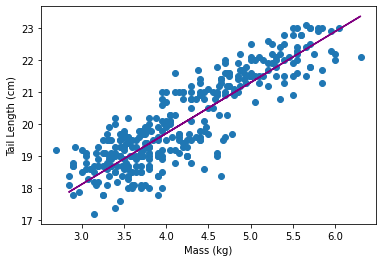

In [30]:
from pandas.core.base import value_counts
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1d_3c7iD2wF59yXPTB5pWNFSjdYi5mSGG'})
downloaded.GetContentFile('CatData.csv')

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
data = pd.read_csv("CatData.csv")
df = pd.DataFrame(data)
num = int(len(data)*0.8)
train = data[ :num]
test = data[num: ]

def linear_regression(input_feature, output):
  Xi = input_feature
  Yi = output
  n = len(Xi)
  Xi_mean = Xi.mean()
  Yi_mean = Yi.mean()
  S_Xi = (Xi).sum()
  S_Yi = (Yi).sum()
  S_XiYi = ((Xi*Yi).sum())*n
  S_Xi_S_Yi = S_Xi*S_Yi
  S_XiXi = ((Xi*Xi).sum())*n
  S_Xi_Square = S_Xi*S_Xi
  slope = (S_XiYi - S_Xi_S_Yi) / (S_XiXi - S_Xi_Square)
  intercept = Yi_mean - (slope * Xi_mean)
  return slope, intercept

actual_slope,actual_intercept = linear_regression(train["Mass (kg)"],train["Tail Length (cm)"])

plt.scatter(data["Mass (kg)"],data["Tail Length (cm)"])
plt.plot(train["Mass (kg)"],actual_slope*train["Mass (kg)"]+actual_intercept,color="purple")
plt.xlabel("Mass (kg)")
plt.ylabel("Tail Length (cm)")
plt.show()